<a href="https://colab.research.google.com/github/hudza03/pbakelompok8/blob/main/Analisis_Sentimen_Cluster_inDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [6]:
# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'Deskripsi'
documents = df['Deskripsi']

In [7]:
# Display the DataFrame
print(df.head())

   No                                          Deskripsi Penerbit  \
0   1  inDrive pertahankan posisi aplikasi ride-haili...      NaN   
1   2  inDrive Berikan Bonus Hari Raya untuk Ojol Ber...      NaN   
2   3  Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...      NaN   
3   4  InDrive faces termination for flouting guidelines      NaN   
4   5  Begini Respon Grab, Gojek, Maxim hingga inDriv...      NaN   

                                         Link Sumber   PIC Label Kategori  \
0  https://m.antaranews.com/amp/berita/4852233/in...  Bayu            NaN   
1  https://www.tempo.co/ekonomi/indrive-berikan-b...  Bayu            NaN   
2  Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...  Bayu            NaN   
3  https://www.scoop.my/news/255636/indrive-faces...  Bayu            NaN   
4        https://solobalapan.jawapos.com/tag/inDrive  Bayu            NaN   

  Tanggal Berita  Unnamed: 7    pic  jml berita  
0            NaT         NaN   Afaf        26.0  
1            NaT      

In [8]:
# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)  # Use read_excel for .xlsx files

In [9]:
df

,No,Deskripsi,Penerbit,Link Sumber,PIC,Label Kategori,Tanggal Berita,Unnamed: 7,pic,jml berita
0,1,inDrive pertahankan posisi aplikasi ride-haili...,NaN,https://m.antaranews.com/amp/berita/4852233/in...,Bayu,NaN,NaT,NaN,Afaf,26.0
1,2,inDrive Berikan Bonus Hari Raya untuk Ojol Ber...,NaN,https://www.tempo.co/ekonomi/indrive-berikan-b...,Bayu,NaN,NaT,NaN,bayu,26.0
2,3,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,NaN,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,Bayu,NaN,NaT,NaN,Hudza,50.0
3,4,InDrive faces termination for flouting guidelines,NaN,https://www.scoop.my/news/255636/indrive-faces...,Bayu,NaN,NaT,NaN,NaN,NaN
4,5,"Begini Respon Grab, Gojek, Maxim hingga inDriv...",NaN,https://solobalapan.jawapos.com/tag/inDrive,Bayu,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
146,147,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
147,148,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
148,149,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


TF-IDF Clustering Performance:
Silhouette Score: 0.015128684516346929
Calinski-Harabasz Score: 2.156411312966965
Davies-Bouldin Score: 5.619715520176818
Bag of Words Clustering Performance:
Silhouette Score: 0.07923043859928926
Calinski-Harabasz Score: 4.474859860015408
Davies-Bouldin Score: 2.518710916788223
Cosine Similarity Clustering Performance:
Silhouette Score: 0.13042643311212423
Calinski-Harabasz Score: 13.975448373882411
Davies-Bouldin Score: 1.9602322262055167


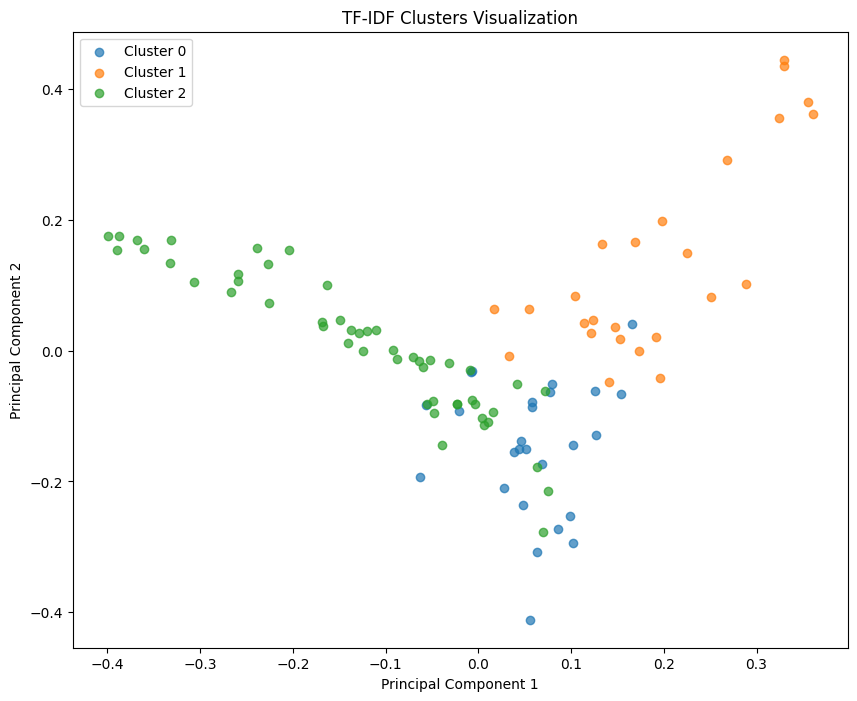

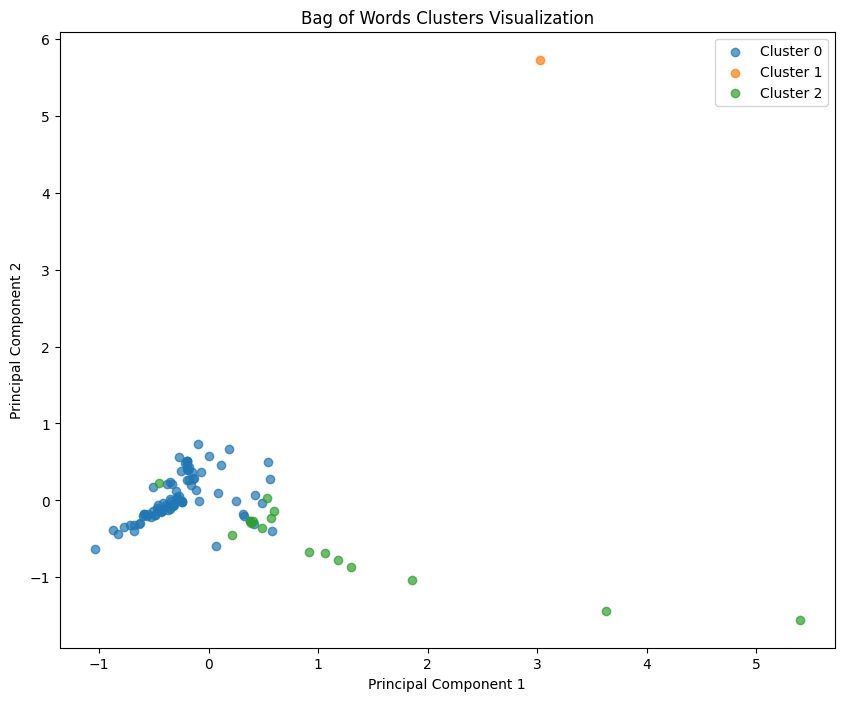

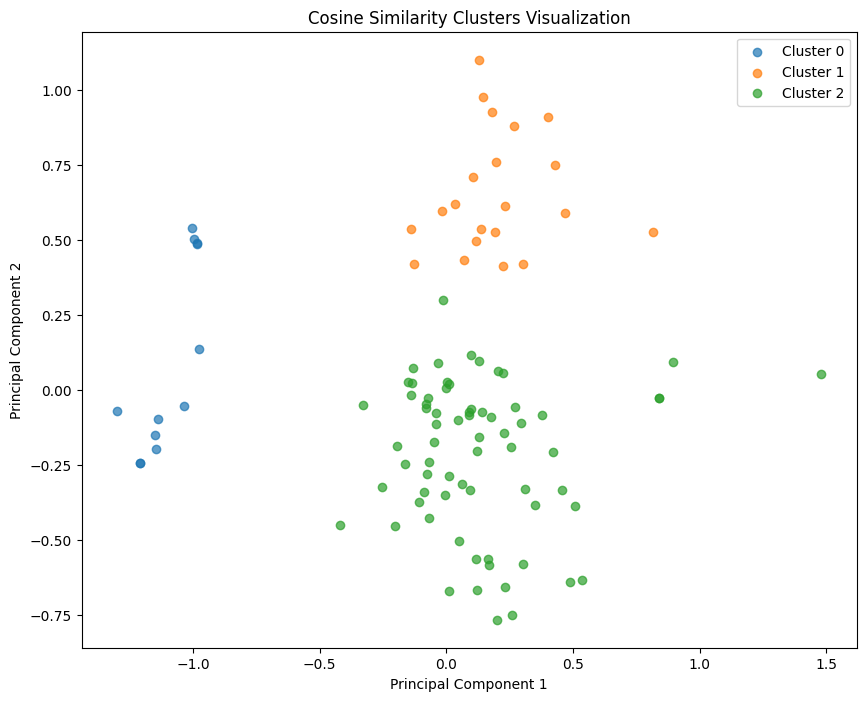

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'Deskripsi'
documents = df['Deskripsi'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

TF-IDF Clustering Performance:
Silhouette Score: 0.013375473410848444
Calinski-Harabasz Score: 1.87918216027897
Davies-Bouldin Score: 4.988654776329305
Bag of Words Clustering Performance:
Silhouette Score: 0.1258904254920584
Calinski-Harabasz Score: 3.8090904746819296
Davies-Bouldin Score: 1.3949209397774553
Cosine Similarity Clustering Performance:
Silhouette Score: 0.11981726369157453
Calinski-Harabasz Score: 11.335229586736835
Davies-Bouldin Score: 2.2636289693179


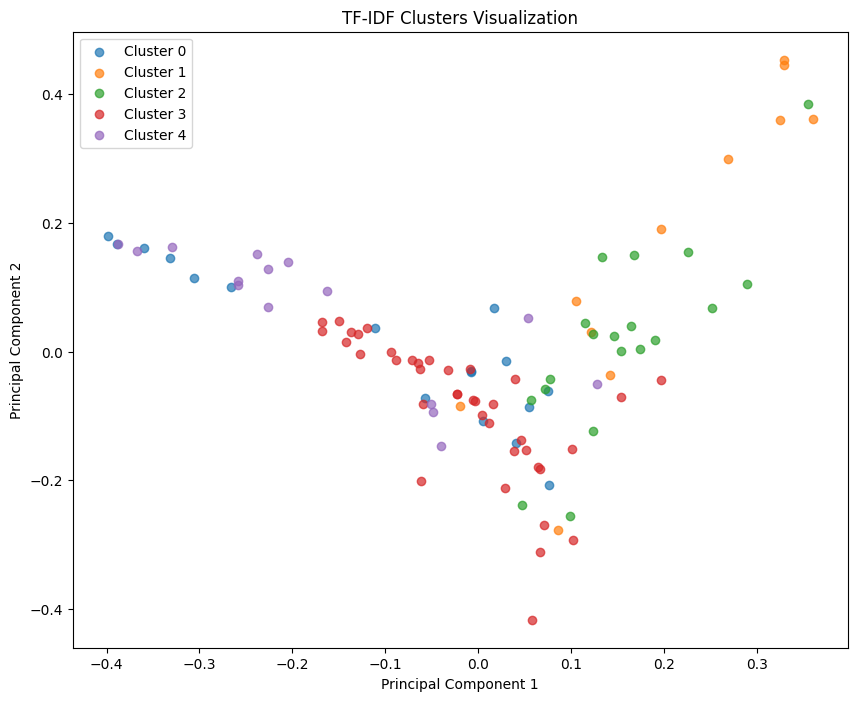

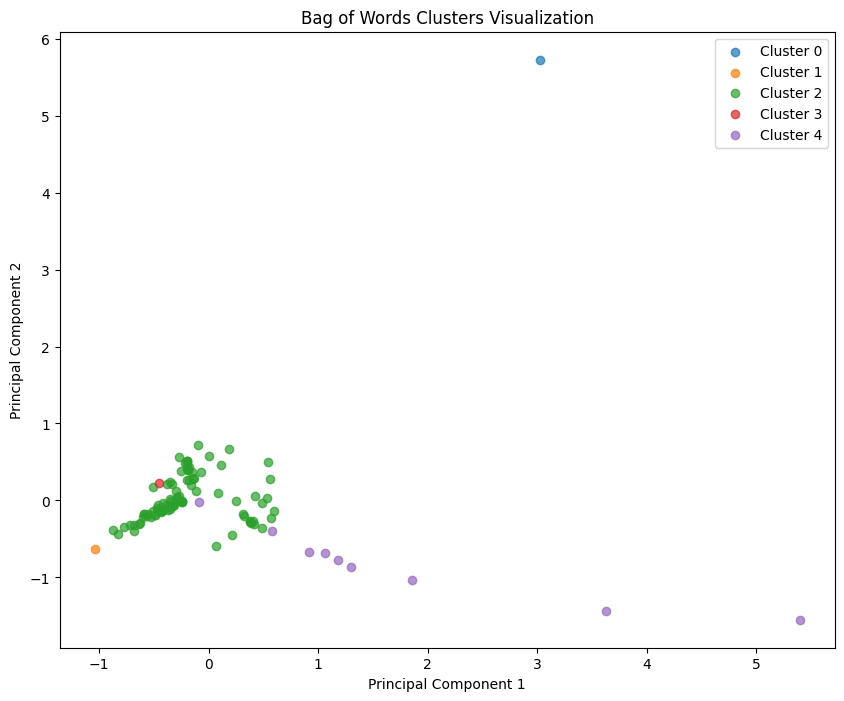

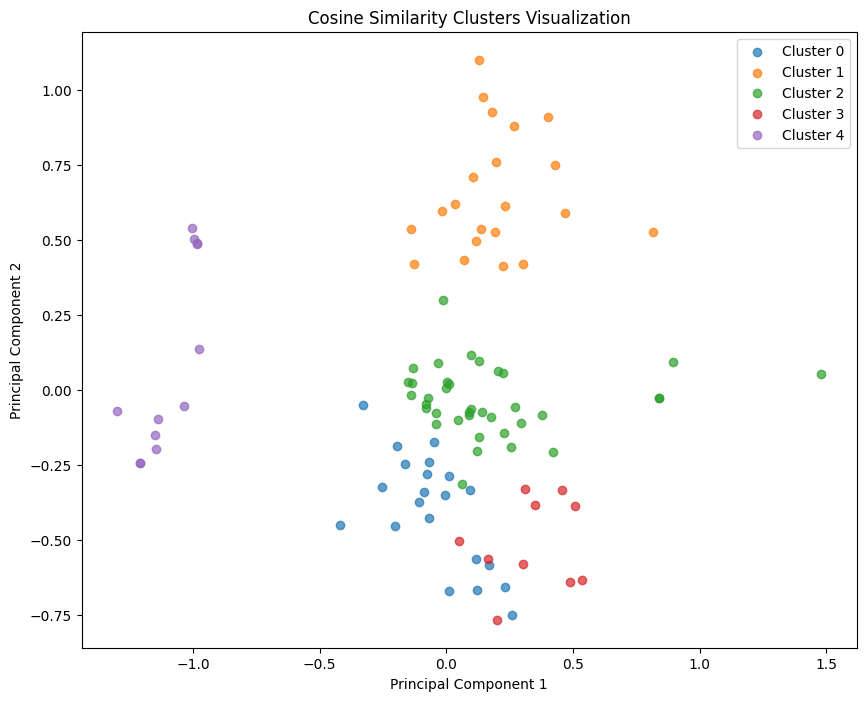

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'Deskripsi'
documents = df['Deskripsi'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 5  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Import Libraries

This block imports all the necessary libraries required for data manipulation, clustering, evaluation, and visualization



In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

# 2. Load the Dataset

This block loads the dataset from an Excel file and prepares the relevant text data for processing.

In [13]:
# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'Deskripsi'
documents = df['Deskripsi'].dropna()  # Drop any NaN values

# 3. Define Clustering and Evaluation Functions

This block defines functions to perform clustering using KMeans and evaluate the clustering performance based on various metrics.

In [14]:
# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

def get_top_terms(vectorizer, kmeans_model, n_terms=10):
    """Get the top n terms for each cluster."""
    terms = vectorizer.get_feature_names_out()  # Mendapatkan istilah dari vektorizer
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]  # Mengurutkan pusat cluster

    top_terms = {}
    for i in range(len(order_centroids)):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms] if ind < len(terms)]  # Memastikan indeks tidak keluar batas

    return top_terms


# Function to count documents in each cluster
def count_documents_per_cluster(cluster_labels):
    return Counter(cluster_labels)

# 4. Determine Optimal Number of Clusters with Silhoutte Score (TFIDF Only)
This block uses the Elbow Method or Silhouette Score analysis to help determine the optimal number of clusters with Silhoutte Score

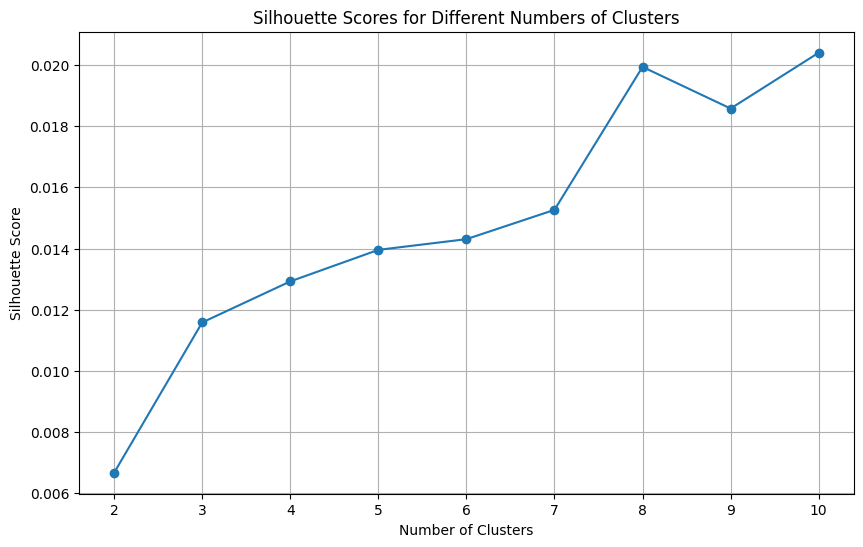

In [15]:
# Determine optimal number of clusters using Elbow Method or Silhouette Score
def find_optimal_clusters(X):
    silhouette_scores = []
    K_range = range(2, 11)  # Test for clusters from 2 to 10

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(K_range)
    plt.grid()
    plt.show()

# Call this function with TF-IDF matrix to find optimal clusters
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
find_optimal_clusters(X_tfidf)  # This will plot the silhouette scores for different cluster numbers

# 5. TF-IDF Vectorization and Clustering

This block performs TF-IDF vectorization on the documents and applies KMeans clustering.

In [16]:
# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# Get top terms for TF-IDF clusters
top_terms_tfidf = get_top_terms(tfidf_vectorizer, KMeans(n_clusters=num_clusters).fit(X_tfidf))
print("\nTop terms in each TF-IDF cluster:")
for i, terms in top_terms_tfidf.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each TF-IDF cluster
doc_count_tfidf = count_documents_per_cluster(labels_tfidf)
print("\nJumlah dokumen di tiap TF-IDF cluster:")
for label, count in doc_count_tfidf.items():
    print(f"Cluster {label}: {count} instances")

TF-IDF Clustering Performance:
Silhouette Score: 0.015128684516346929
Calinski-Harabasz Score: 2.156411312966965
Davies-Bouldin Score: 5.619715520176818

Top terms in each TF-IDF cluster:
Cluster 0: to, app, in, and, indrive, ride, hailing, maxim, operations, cease
Cluster 1: program, indonesia, lewat, indrive, di, luncurkan, untuk, updrive, sosial, pasar
Cluster 2: indrive, di, layanan, dan, dilarang, beroperasi, aplikasi, jatim, pengemudi, untuk

Jumlah dokumen di tiap TF-IDF cluster:
Cluster 2: 50 instances
Cluster 0: 26 instances
Cluster 1: 25 instances


# 6. Bag of Words (BoW) Vectorization and Clustering

This block performs Bag of Words vectorization on the documents and applies KMeans clustering.

In [17]:
# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# Get top terms for BoW clusters
top_terms_bow = get_top_terms(bow_vectorizer, KMeans(n_clusters=num_clusters).fit(X_bow))
print("\nTop terms in each BoW cluster:")
for i, terms in top_terms_bow.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each BoW cluster
doc_count_bow = count_documents_per_cluster(labels_bow)
print("\nJumlah dokumen di tiap BoW cluster:")
for label, count in doc_count_bow.items():
    print(f"Cluster {label}: {count} instances")

Bag of Words Clustering Performance:
Silhouette Score: 0.07923043859928926
Calinski-Harabasz Score: 4.474859860015408
Davies-Bouldin Score: 2.518710916788223

Top terms in each BoW cluster:
Cluster 0: indrive, to, driver, dan, in, maxim, app, and, ride, hailing
Cluster 1: di, indrive, dilarang, beroperasi, online, jatim, ini, indonesia, transportasi, pengemudi
Cluster 2: indrive, layanan, untuk, kembangkan, program, luncurkan, pengemudi, hailing, barang, dukung

Jumlah dokumen di tiap BoW cluster:
Cluster 0: 84 instances
Cluster 2: 16 instances
Cluster 1: 1 instances


# 7. Cosine Similarity Clustering

This block calculates cosine similarity from the BoW representation and performs KMeans clustering.

In [18]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.13042643311212423
Calinski-Harabasz Score: 13.975448373882411
Davies-Bouldin Score: 1.9602322262055167

Top terms in each Cosine Similarity cluster:
Cluster 0: bawa, blocked, be, and, but, bebankan, alasan, cegah, cease, biaya
Cluster 1: big, after, amid, adu, business, admin, all, allowed, ajak, 2026
Cluster 2: 2025, bisa, ai, adalah, bantuan, assault, all, catalyst, begini, berjudul

Jumlah dokumen di tiap Cosine Similarity cluster:
Cluster 2: 68 instances
Cluster 1: 21 instances
Cluster 0: 12 instances


In [19]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_tfidf)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.049771211272720224
Calinski-Harabasz Score: 5.416309132292921
Davies-Bouldin Score: 3.5566520488948004

Top terms in each Cosine Similarity cluster:
Cluster 0: assault, berkat, berjudul, appeal, bantuan, berperang, bali, berupa, begini, asal
Cluster 1: amid, big, admin, after, business, adu, 2026, berikut, ajak, allowed
Cluster 2: berdayakan, 2025, bisa, bobby, bebas, bisnis, capitalism, alasannya, ada, blocked

Jumlah dokumen di tiap Cosine Similarity cluster:
Cluster 0: 24 instances
Cluster 2: 55 instances
Cluster 1: 22 instances


# Optimal Clustering dengan KMeans + TFIDF, Bow, Cosine (WCSS Method)

Number of NaN values: 49


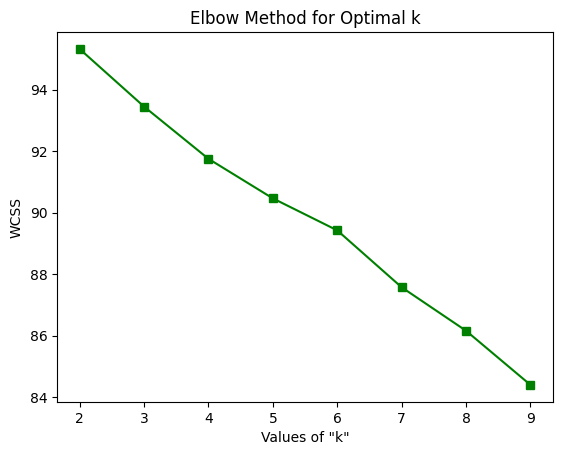

In [20]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)


documents = df['Deskripsi']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_

# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Number of NaN values: 49


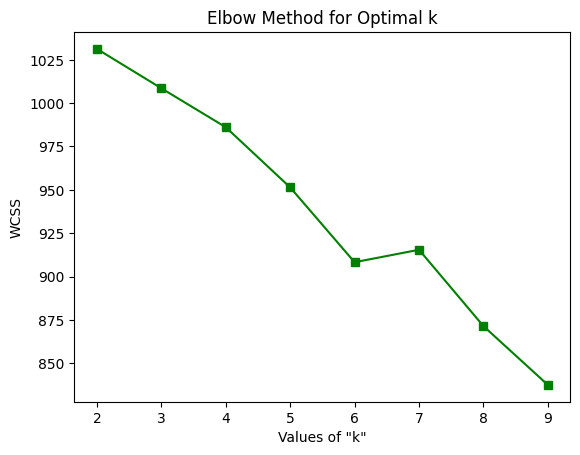

In [21]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)


documents = df['Deskripsi']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag-of-Words features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_


# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Number of NaN values: 49


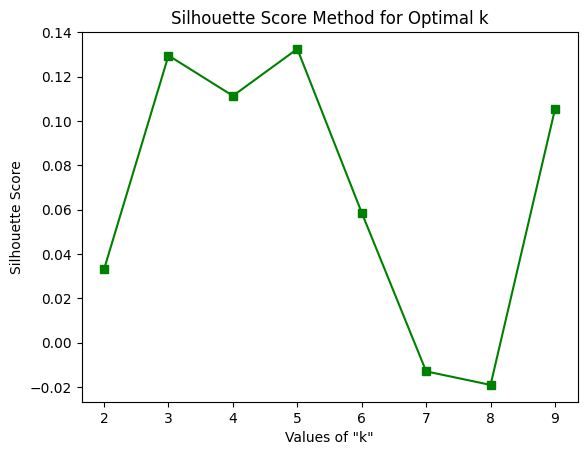

The optimal number of clusters based on silhouette score is: 5


In [22]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)


documents = df['Deskripsi']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag of Words (BOW) features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(X)

# Determine optimal k using silhouette score
limit = int((X.shape[0] // 2) ** 0.5)
silhouette_scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(cosine_sim)
    silhouette_avg = silhouette_score(cosine_sim, labels, metric="cosine")
    silhouette_scores.append((k, silhouette_avg))

# Extracting the optimal k value based on the maximum silhouette score
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]

# Plotting silhouette scores to find the optimal number of clusters
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")


# 8. Visualization of Clusters Based On WCSS Method

This block visualizes the clusters formed by TF-IDF, BoW, and cosine similarity using PCA.

TF-IDF Clustering Performance:
Silhouette Score: 0.015128684516346929
Calinski-Harabasz Score: 2.156411312966965
Davies-Bouldin Score: 5.619715520176818
Bag of Words Clustering Performance:
Silhouette Score: 0.07923043859928926
Calinski-Harabasz Score: 4.474859860015408
Davies-Bouldin Score: 2.518710916788223
Cosine Similarity Clustering Performance:
Silhouette Score: 0.13042643311212423
Calinski-Harabasz Score: 13.975448373882411
Davies-Bouldin Score: 1.9602322262055167


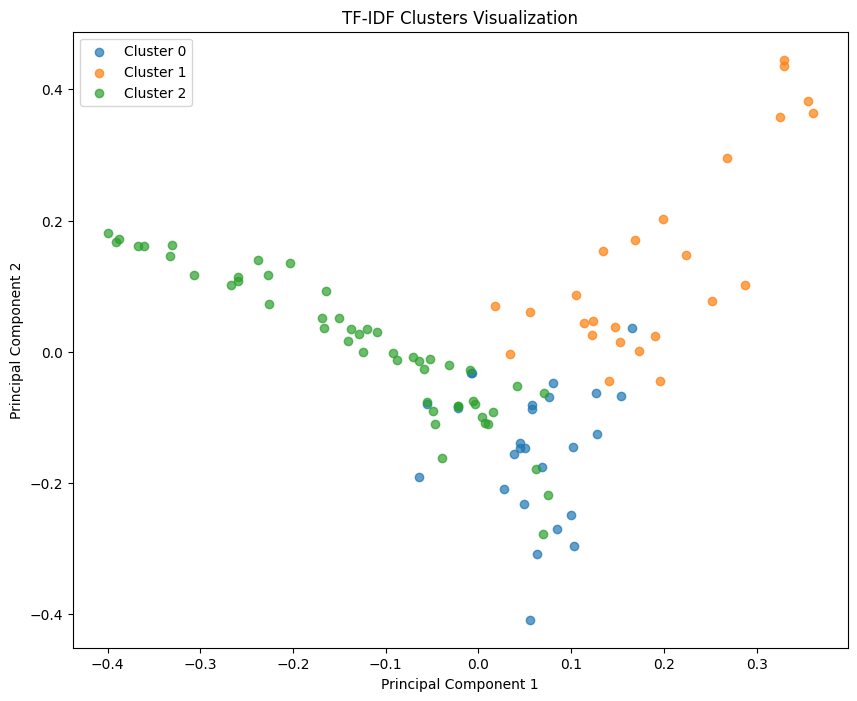

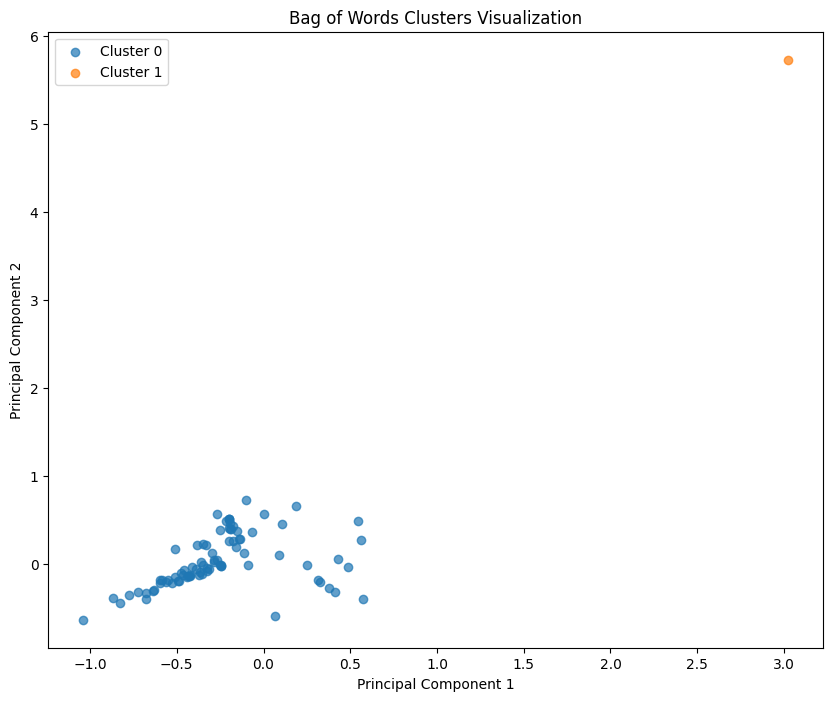

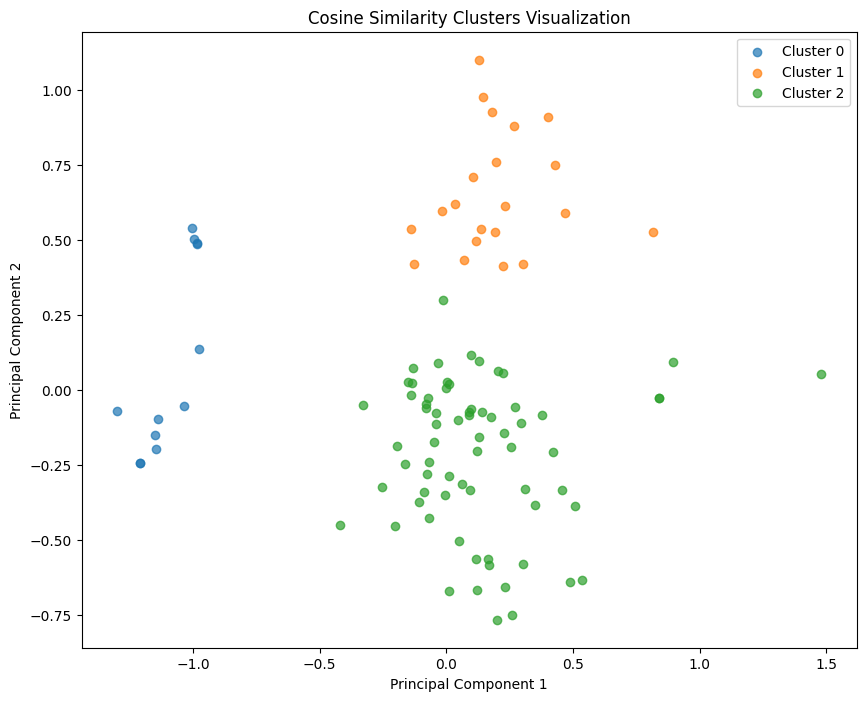

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'Deskripsi'
documents = df['Deskripsi'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)


labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=3).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(2):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 9. Analisis Sentimen



                                           Deskripsi  sentiment_textblob
0  inDrive pertahankan posisi aplikasi ride-haili...                 0.0
1  inDrive Berikan Bonus Hari Raya untuk Ojol Ber...                 0.0
2  Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...                 0.0
3  InDrive faces termination for flouting guidelines                 0.0
4  Begini Respon Grab, Gojek, Maxim hingga inDriv...                 0.0


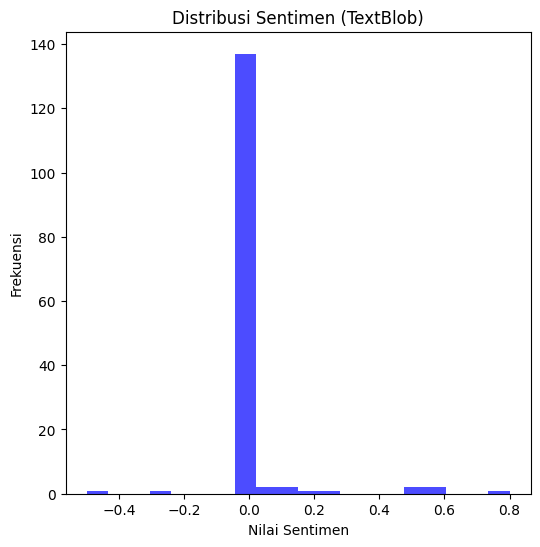

In [26]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Ubah semua isi kolom jadi string dan isi NaN dengan string kosong
df['Deskripsi'] = df['Deskripsi'].fillna("").astype(str)

# Fungsi untuk analisis sentimen menggunakan TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Menggunakan polarity untuk menentukan sentimen
    return analysis.sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Terapkan analisis sentimen menggunakan TextBlob
df['sentiment_textblob'] = df['Deskripsi'].apply(analyze_sentiment_textblob)

# Tampilkan hasil analisis sentimen
print(df[['Deskripsi', 'sentiment_textblob']].head())

# Visualisasi hasil analisis sentimen
plt.figure(figsize=(6, 6))

# Histogram untuk sentimen TextBlob
plt.hist(df['sentiment_textblob'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Sentimen (TextBlob)')
plt.xlabel('Nilai Sentimen')
plt.ylabel('Frekuensi')

plt.show()


Hasil Kategorisasi Sentimen (TextBlob):
sentiment_category_textblob
Netral     136
Positif     11
Negatif      3
Name: count, dtype: int64


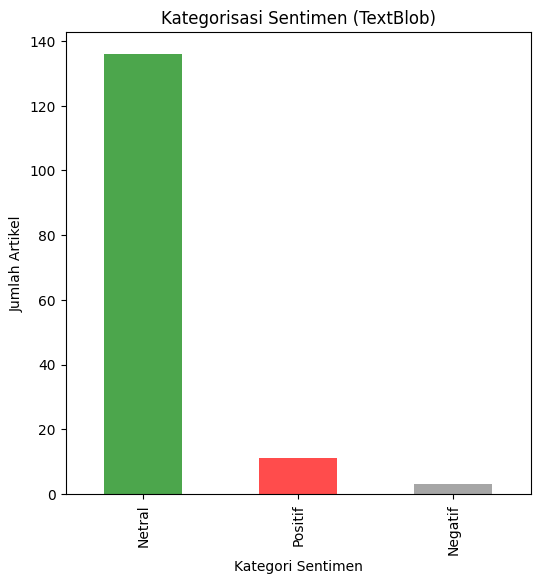

In [27]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Fungsi untuk analisis sentimen menggunakan TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Kategorikan sentimen berdasarkan nilai polaritas
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positif'
    elif polarity < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Terapkan analisis sentimen menggunakan TextBlob
df['sentiment_textblob'] = df['Deskripsi'].apply(analyze_sentiment_textblob)

# Terapkan kategori sentimen untuk TextBlob
df['sentiment_category_textblob'] = df['sentiment_textblob'].apply(categorize_sentiment)

# Hitung jumlah artikel berdasarkan kategori sentimen
sentiment_counts_textblob = df['sentiment_category_textblob'].value_counts()

# Tampilkan hasil
print("Hasil Kategorisasi Sentimen (TextBlob):")
print(sentiment_counts_textblob)

# Visualisasi hasil kategorisasi sentimen
plt.figure(figsize=(6, 6))

# Bar plot untuk hasil TextBlob
sentiment_counts_textblob.plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.7)
plt.title('Kategorisasi Sentimen (TextBlob)')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Artikel')

plt.show()


In [28]:
df

,No,Deskripsi,Penerbit,Link Sumber,PIC,Label Kategori,Tanggal Berita,Unnamed: 7,pic,jml berita,sentiment_textblob,sentiment_category_textblob
0,1,inDrive pertahankan posisi aplikasi ride-haili...,NaN,https://m.antaranews.com/amp/berita/4852233/in...,Bayu,NaN,NaT,NaN,Afaf,26.0,0.0,Netral
1,2,inDrive Berikan Bonus Hari Raya untuk Ojol Ber...,NaN,https://www.tempo.co/ekonomi/indrive-berikan-b...,Bayu,NaN,NaT,NaN,bayu,26.0,0.0,Netral
2,3,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,NaN,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,Bayu,NaN,NaT,NaN,Hudza,50.0,0.0,Netral
3,4,InDrive faces termination for flouting guidelines,NaN,https://www.scoop.my/news/255636/indrive-faces...,Bayu,NaN,NaT,NaN,NaN,NaN,0.0,Netral
4,5,"Begini Respon Grab, Gojek, Maxim hingga inDriv...",NaN,https://solobalapan.jawapos.com/tag/inDrive,Bayu,NaN,NaT,NaN,NaN,NaN,0.0,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0.0,Netral
146,147,,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0.0,Netral
147,148,,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0.0,Netral
148,149,,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0.0,Netral


Tanggal Berita
2021-10-19    1
2022-06-16    1
2022-10-05    2
2022-10-08    1
2022-10-11    1
             ..
2025-09-09    1
2025-09-10    2
2025-09-14    2
2025-09-15    1
2025-09-16    1
Length: 61, dtype: int64


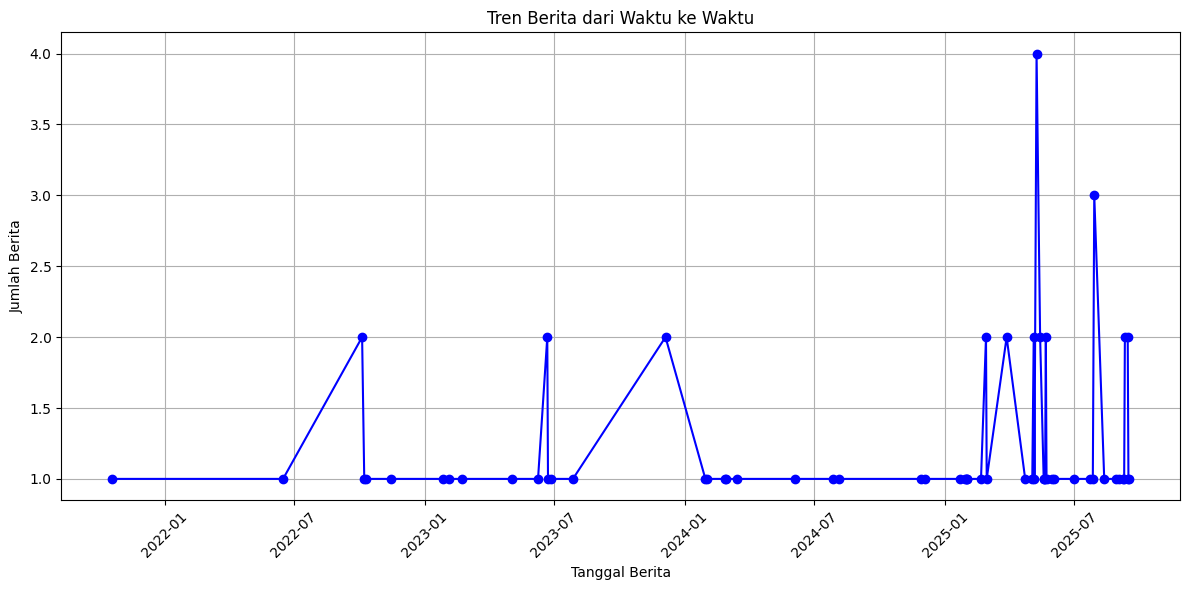

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'tanggal' dalam format datetime
df['Tanggal Berita'] = pd.to_datetime(df['Tanggal Berita'])

# Hitung jumlah berita berdasarkan tanggal
trends = df.groupby('Tanggal Berita').size()

# Tampilkan hasil tren berita
print(trends)

# Visualisasi tren berita
plt.figure(figsize=(12, 6))
plt.plot(trends.index, trends.values, marker='o', linestyle='-', color='blue')
plt.title('Tren Berita dari Waktu ke Waktu')
plt.xlabel('Tanggal Berita')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Tanggal Berita
2021-10-19    0.000
2022-06-16    0.000
2022-10-05    0.000
2022-10-08    0.000
2022-10-11    0.000
              ...  
2025-09-09    0.500
2025-09-10    0.000
2025-09-14    0.125
2025-09-15    0.000
2025-09-16    0.000
Name: sentiment_textblob, Length: 61, dtype: float64


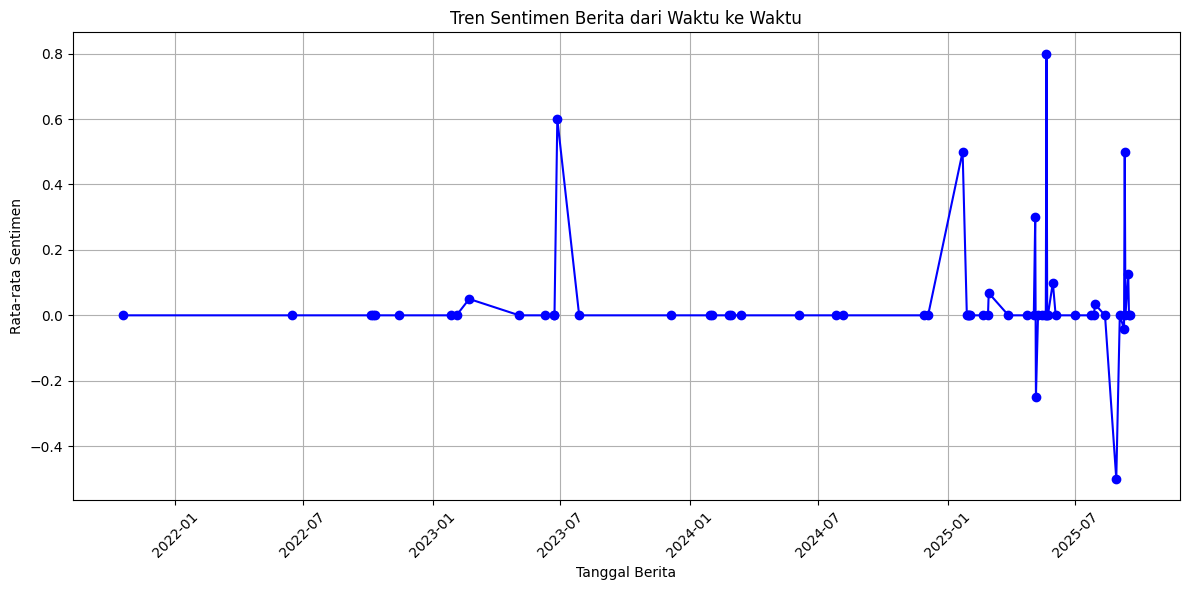

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'tanggal' dalam format datetime
df['Tanggal Berita'] = pd.to_datetime(df['Tanggal Berita'])

# Hitung rata-rata sentimen berdasarkan tanggal
sentiment_trends = df.groupby('Tanggal Berita')['sentiment_textblob'].mean()

# Tampilkan hasil tren sentimen
print(sentiment_trends)

# Visualisasi tren sentimen dengan line plot
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends.index, sentiment_trends.values, marker='o', linestyle='-', color='blue')
plt.title('Tren Sentimen Berita dari Waktu ke Waktu')
plt.xlabel('Tanggal Berita')
plt.ylabel('Rata-rata Sentimen')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


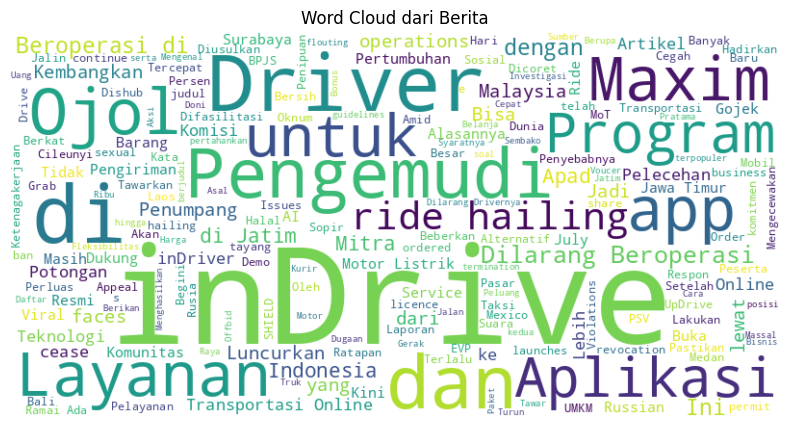

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan semua teks dari kolom 'Deskripsi'
text_data = ' '.join(df['Deskripsi'].astype(str))

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_data)

# Visualisasi word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Matikan sumbu
plt.title('Word Cloud dari Berita')
plt.show()


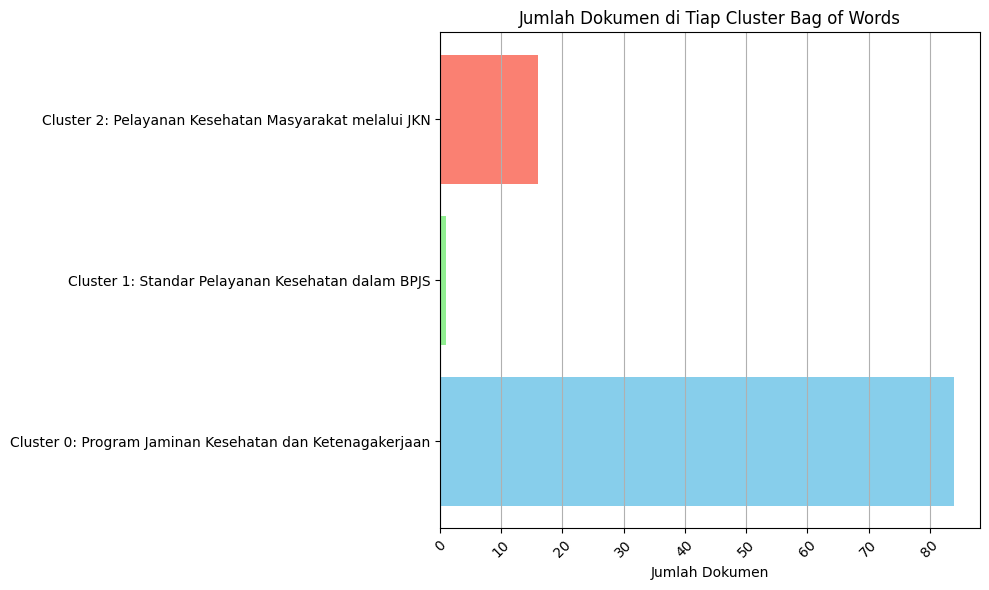

In [34]:
import matplotlib.pyplot as plt

# Data jumlah dokumen di tiap cluster
clusters = ['Cluster 0: Program Jaminan Kesehatan dan Ketenagakerjaan',
            'Cluster 1: Standar Pelayanan Kesehatan dalam BPJS',
            'Cluster 2: Pelayanan Kesehatan Masyarakat melalui JKN']

# Jumlah dokumen per cluster dari hasil count_documents_per_cluster
doc_counts = [doc_count_bow[0], doc_count_bow[1], doc_count_bow[2]]  # Pastikan untuk mendapatkan jumlah dari doc_count_bow

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.barh(clusters, doc_counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Jumlah Dokumen')
plt.title('Jumlah Dokumen di Tiap Cluster Bag of Words')
plt.xticks(rotation=45)
plt.grid(axis='x')

# Tampilkan plot
plt.tight_layout()
plt.show()


# 10. POS and NER


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [38]:
# Load the dataset
file_path = '/content/Project A PBA_Kelompok 8.xlsx'
df_text = pd.read_excel(file_path)

# Assuming the relevant text column is named 'Deskripsi'
#documents = df['Deskripsi']
df_text

,No,Deskripsi,Penerbit,Link Sumber,PIC,Label Kategori,Tanggal Berita,Unnamed: 7,pic,jml berita
0,1,inDrive pertahankan posisi aplikasi ride-haili...,NaN,https://m.antaranews.com/amp/berita/4852233/in...,Bayu,NaN,NaT,NaN,Afaf,26.0
1,2,inDrive Berikan Bonus Hari Raya untuk Ojol Ber...,NaN,https://www.tempo.co/ekonomi/indrive-berikan-b...,Bayu,NaN,NaT,NaN,bayu,26.0
2,3,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,NaN,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...,Bayu,NaN,NaT,NaN,Hudza,50.0
3,4,InDrive faces termination for flouting guidelines,NaN,https://www.scoop.my/news/255636/indrive-faces...,Bayu,NaN,NaT,NaN,NaN,NaN
4,5,"Begini Respon Grab, Gojek, Maxim hingga inDriv...",NaN,https://solobalapan.jawapos.com/tag/inDrive,Bayu,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
146,147,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
147,148,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
148,149,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [39]:
!pip install polyglot
!pip install icu
!pip install pycld2
!pip install pyicu # Install the missing pyicu dependency
!pip install morfessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52563 sha256=8d461872a861449e6b33ea3218bbb9bb7b23c726c5be98435efb50062a183e4b
  Stored in directory: /root/.cache/pip/wheels/c7/5e/28/47349211ec1f91379f41ed10bc2520f7071ecfb6cbe182f6fe
Successfully built polyglot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=pyicu-2.15.3-cp312-cp312-linux_x86_64.whl size=2720026 sha256=545b74d0374f4651172e5dc24f8ee69e0956e9c1e20e11a1c5070ecfa8d59f12
  Stored in directory: /root/.cache/pip/wheels/46/

In [40]:
import polyglot
from polyglot.text import Text, Word

In [41]:
# Importing packages and loading in the data set
import pandas as pd
from collections import defaultdict
import math
import numpy as np
from polyglot.detect import Detector
import unicodedata
import re

In [42]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Fungsi untuk mendeteksi bahasa dengan penanganan error
def detect_language(text):
    try:
        detector = Detector(text, quiet=True)
        return detector.language.code, detector.language.name
    except Exception as e:
        return "unknown", str(e)

# Iterasi melalui baris dan deteksi bahasa
for index, row in df_text.iterrows():
    cleaned_text = clean_text(row['Deskripsi'])
    lang_code, lang_name = detect_language(cleaned_text)
    print(f"Row {index + 1}: Language Detected: Code={lang_code}, Name={lang_name}")

    # Hentikan setelah 10 baris untuk demonstrasi
    if index == 9:
        break

Row 1: Language Detected: Code=id, Name=Indonesian
Row 2: Language Detected: Code=id, Name=Indonesian
Row 3: Language Detected: Code=id, Name=Indonesian
Row 4: Language Detected: Code=en, Name=English
Row 5: Language Detected: Code=id, Name=Indonesian
Row 6: Language Detected: Code=id, Name=Indonesian
Row 7: Language Detected: Code=id, Name=Indonesian
Row 8: Language Detected: Code=id, Name=Indonesian
Row 9: Language Detected: Code=id, Name=Indonesian
Row 10: Language Detected: Code=id, Name=Indonesian


In [43]:
df_content1 = df_text['Deskripsi'][0]
df_content1

'inDrive pertahankan posisi aplikasi ride-hailing kedua terpopuler'

In [44]:
df_content1_pos = Text(df_content1)
df_content1_pos.words

WordList(['inDrive', 'pertahankan', 'posisi', 'aplikasi', 'ride', '-', 'hailing', 'kedua', 'terpopuler'])

In [45]:
!pip install polyglot
!polyglot download embeddings2.id
!polyglot download pos2.id

[polyglot_data] Error loading embeddings2.id: HTTP Error 403:
[polyglot_data]     Forbidden
Error installing package. Retry? [n/y/e]
Exception ignored in: <function _TemporaryFileCloser.__del__ at 0x7c2c458af6a0>
Traceback (most recent call last):
  File "/usr/lib/python3.12/tempfile.py", line 472, in __del__
    self.cleanup()
  File "/usr/lib/python3.12/tempfile.py", line 452, in cleanup
    self.file.close()
  File "/usr/lib/python3.12/http/client.py", line 435, in close
    self._close_conn()
  File "/usr/lib/python3.12/http/client.py", line 428, in _close_conn
    fp.close()
  File "/usr/lib/python3.12/socket.py", line 790, in close
    self._sock._decref_socketios()
  File "/usr/lib/python3.12/socket.py", line 495, in _decref_socketios
    self.close()
  File "/usr/lib/python3.12/socket.py", line 505, in close
    self._real_close()
  File "/usr/lib/python3.12/socket.py", line 499, in _real_close
    _ss.close(self)
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/

In [46]:
df_content1_pos = Text(df_content1)

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)
for word, tag in df_content1_pos.pos_tags: # Changed 'text' to 'df_content1_pos'
    print(u"{:<16}{:>2}".format(word, tag))

Word            POS Tag
------------------------------


HTTPError: HTTP Error 403: Forbidden

## POS Tag Content Text Berita All

In [47]:
df_text['Deskripsi']

,Deskripsi
0,inDrive pertahankan posisi aplikasi ride-haili...
1,inDrive Berikan Bonus Hari Raya untuk Ojol Ber...
2,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...
3,InDrive faces termination for flouting guidelines
4,"Begini Respon Grab, Gojek, Maxim hingga inDriv..."
...,...
145,NaN
146,NaN
147,NaN
148,NaN


In [50]:
import unicodedata
import re

def clean_text(text):
    # Handle non-string input by returning an empty string or converting to string
    if not isinstance(text, str):
        return ""
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Fill missing values with empty strings before applying the cleaning function
df_text['Deskripsi'] = df_text['Deskripsi'].fillna('').apply(clean_text)

In [51]:
df_content_all = df_text['Deskripsi']
df_content_all

,Deskripsi
0,inDrive pertahankan posisi aplikasi ride-haili...
1,inDrive Berikan Bonus Hari Raya untuk Ojol Ber...
2,Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...
3,InDrive faces termination for flouting guidelines
4,"Begini Respon Grab, Gojek, Maxim hingga inDriv..."
...,...
145,
146,
147,
148,


In [52]:
!polyglot download embeddings2.id  # Untuk embeddings bahasa Indonesia
!polyglot download pos2.id          # Untuk POS tagging bahasa Indonesia


[polyglot_data] Error loading embeddings2.id: HTTP Error 403:
[polyglot_data]     Forbidden
Error installing package. Retry? [n/y/e]
Traceback (most recent call last):
  File "/usr/local/bin/polyglot", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/polyglot/__main__.py", line 280, in main
    args.func(args)
  File "/usr/local/lib/python3.12/dist-packages/polyglot/__main__.py", line 108, in download
    rv = downloader.download(info_or_id=unicode(pkg_id), download_dir=args.dir,
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/polyglot/downloader.py", line 674, in download
    choice = unicode(input().strip())
                     ^^^^^^^
KeyboardInterrupt
^C
[polyglot_data] Error loading pos2.id: HTTP Error 403: Forbidden
Error installing package. Retry? [n/y/e]
Traceback (most recent call last):
  File "/usr/local/bin/polyglot", line 8, in <modul

In [53]:
!polyglot list


usage: polyglot [-h] [--lang LANG] [--delimiter DELIMITER] [--workers WORKERS]
                [-l LOG] [--debug]
                {detect,morph,tokenize,download,count,cat,ner,pos,transliteration,sentiment}
                ...
polyglot: error: argument {detect,morph,tokenize,download,count,cat,ner,pos,transliteration,sentiment}: invalid choice: 'list' (choose from detect, morph, tokenize, download, count, cat, ner, pos, transliteration, sentiment)


In [54]:
!pip install polyglot
!pip install pyicu
!pip install icu
!pip install pycld2
!pip install morfessor


In [55]:
!polyglot download embeddings2.id
!polyglot download pos2.id


[polyglot_data] Error loading embeddings2.id: HTTP Error 403:
[polyglot_data]     Forbidden
Error installing package. Retry? [n/y/e]
Traceback (most recent call last):
object address  : 0x79a3e3e32380
object refcount : 3
object type     : 0xa274e0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr
^C
[polyglot_data] Error loading pos2.id: HTTP Error 403: Forbidden
Error installing package. Retry? [n/y/e]
Traceback (most recent call last):
  File "/usr/local/bin/polyglot", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/polyglot/__main__.py", line 280, in main
    args.func(args)
  File "/usr/local/lib/python3.12/dist-packages/polyglot/__main__.py", line 108, in download
  File "/usr/local/lib/python3.12/dist-packages/polyglot/downloader.py", line 674, in download
    choice = unicode(input().strip())
                     ^^^^^^^
KeyboardInterrupt
^C


In [56]:
from polyglot.text import Text
from polyglot.detect import Detector

# Initialize an empty list to store POS tags for each text
all_pos_tags = []

# Iterate over each text in the DataFrame
for text in df_content_all:
    try:
        # Deteksi bahasa teks
        lang = Detector(text).language.code
        if lang == 'id':  # Pastikan bahasa sesuai (Indonesia)
            text_obj = Text(text, hint_language_code='id')

            # Get POS tags for the current text
            pos_tags = [(word, tag) for word, tag in text_obj.pos_tags]

            all_pos_tags.append(pos_tags)
        else:
            print(f"Skipping text with detected language: {lang}")
            all_pos_tags.append([])

    except Exception as e:
        print(f"Error processing text: {e}")
        all_pos_tags.append([])

# Example: Print POS tags for the first 5 texts
for i, pos_tags in enumerate(all_pos_tags[:5]):
    print(f"POS tags for text {i+1}:")
    print(pos_tags)
    print()


Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden


Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: ms
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: sco
Error processing text: Try passing a longer snippet of text
Error processing text: HTTP Error 403: Forbidden


Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: la
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Skipping text with detected language: ms
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
S

Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: ms
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en


Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Skipping text with detected language: en
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 4

Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: en
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: ms
Skipping text with detected language: ms


Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Skipping text with detected language: ms
Skipping text with detected language: ms
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: HTTP Error 403: Forbidden
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: Try passing a longer snippet of text
Error processing text: T

In [57]:
from polyglot.text import Text
import pandas as pd

# Assuming df_content_all is your Pandas Series containing the text data
# If it's not, replace df_content_all with the correct variable name

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)

# Iterate through each row in the Series
for index, content in df_content_all.items():
    try:
        # Convert the content to string and create a Text object
        text = Text(str(content))

        # Process POS tags for the current text
        for word, tag in text.pos_tags:
            print(u"{:<16}{:>2}".format(word, tag))

        # Add a separator between different texts
        print("-"*30)

    except Exception as e:
        print(f"Error processing row {index}: {str(e)}")
        continue

Word            POS Tag
------------------------------
Error processing row 0: HTTP Error 403: Forbidden
Error processing row 1: HTTP Error 403: Forbidden
Error processing row 2: HTTP Error 403: Forbidden
Error processing row 3: HTTP Error 403: Forbidden
Error processing row 4: HTTP Error 403: Forbidden
Error processing row 5: HTTP Error 403: Forbidden
Error processing row 6: HTTP Error 403: Forbidden


Error processing row 7: HTTP Error 403: Forbidden
Error processing row 8: HTTP Error 403: Forbidden
Error processing row 9: HTTP Error 403: Forbidden
Error processing row 10: HTTP Error 403: Forbidden
Error processing row 11: HTTP Error 403: Forbidden
Error processing row 12: HTTP Error 403: Forbidden
Error processing row 13: HTTP Error 403: Forbidden
Error processing row 14: HTTP Error 403: Forbidden
Error processing row 15: HTTP Error 403: Forbidden
Error processing row 16: HTTP Error 403: Forbidden
Error processing row 17: HTTP Error 403: Forbidden
Error processing row 18: HTTP Error 403: Forbidden


Error processing row 19: HTTP Error 403: Forbidden
Error processing row 20: HTTP Error 403: Forbidden
Error processing row 21: HTTP Error 403: Forbidden
Error processing row 22: HTTP Error 403: Forbidden


Error processing row 23: HTTP Error 403: Forbidden
Error processing row 24: HTTP Error 403: Forbidden
Error processing row 25: HTTP Error 403: Forbidden
Error processing row 26: HTTP Error 403: Forbidden
Error processing row 27: HTTP Error 403: Forbidden
Error processing row 28: HTTP Error 403: Forbidden
Error processing row 29: HTTP Error 403: Forbidden
Error processing row 30: HTTP Error 403: Forbidden
Error processing row 31: HTTP Error 403: Forbidden
Error processing row 32: HTTP Error 403: Forbidden
Error processing row 33: HTTP Error 403: Forbidden
Error processing row 34: HTTP Error 403: Forbidden
Error processing row 35: HTTP Error 403: Forbidden
Error processing row 36: HTTP Error 403: Forbidden
Error processing row 37: HTTP Error 403: Forbidden
Error processing row 38: HTTP Error 403: Forbidden
Error processing row 39: HTTP Error 403: Forbidden
Error processing row 40: HTTP Error 403: Forbidden
Error processing row 41: HTTP Error 403: Forbidden
Error processing row 42: HTTP E

Error processing row 57: HTTP Error 403: Forbidden
Error processing row 58: HTTP Error 403: Forbidden
Error processing row 59: HTTP Error 403: Forbidden
Error processing row 60: HTTP Error 403: Forbidden


Error processing row 61: HTTP Error 403: Forbidden
Error processing row 62: HTTP Error 403: Forbidden
Error processing row 63: HTTP Error 403: Forbidden
Error processing row 64: HTTP Error 403: Forbidden
Error processing row 65: HTTP Error 403: Forbidden
Error processing row 66: HTTP Error 403: Forbidden
Error processing row 67: HTTP Error 403: Forbidden
Error processing row 68: HTTP Error 403: Forbidden
Error processing row 69: HTTP Error 403: Forbidden
Error processing row 70: HTTP Error 403: Forbidden
Error processing row 71: HTTP Error 403: Forbidden
Error processing row 72: HTTP Error 403: Forbidden


Error processing row 73: HTTP Error 403: Forbidden
Error processing row 74: HTTP Error 403: Forbidden
Error processing row 75: HTTP Error 403: Forbidden
Error processing row 76: HTTP Error 403: Forbidden
Error processing row 77: HTTP Error 403: Forbidden
Error processing row 78: HTTP Error 403: Forbidden
Error processing row 79: HTTP Error 403: Forbidden
Error processing row 80: HTTP Error 403: Forbidden
Error processing row 81: HTTP Error 403: Forbidden
Error processing row 82: HTTP Error 403: Forbidden
Error processing row 83: HTTP Error 403: Forbidden
Error processing row 84: HTTP Error 403: Forbidden


Error processing row 85: HTTP Error 403: Forbidden
Error processing row 86: HTTP Error 403: Forbidden
Error processing row 87: HTTP Error 403: Forbidden
Error processing row 88: HTTP Error 403: Forbidden


Error processing row 89: HTTP Error 403: Forbidden
Error processing row 90: HTTP Error 403: Forbidden
Error processing row 91: HTTP Error 403: Forbidden
Error processing row 92: HTTP Error 403: Forbidden


Error processing row 93: HTTP Error 403: Forbidden
Error processing row 94: HTTP Error 403: Forbidden
Error processing row 95: HTTP Error 403: Forbidden
Error processing row 96: HTTP Error 403: Forbidden
Error processing row 97: HTTP Error 403: Forbidden


Error processing row 98: HTTP Error 403: Forbidden
Error processing row 99: HTTP Error 403: Forbidden
Error processing row 100: HTTP Error 403: Forbidden
Error processing row 101: HTTP Error 403: Forbidden


Error processing row 102: HTTP Error 403: Forbidden
Error processing row 103: HTTP Error 403: Forbidden
Error processing row 104: HTTP Error 403: Forbidden
Error processing row 105: HTTP Error 403: Forbidden


Error processing row 106: HTTP Error 403: Forbidden
Error processing row 107: HTTP Error 403: Forbidden
Error processing row 108: HTTP Error 403: Forbidden
Error processing row 109: HTTP Error 403: Forbidden


Error processing row 110: HTTP Error 403: Forbidden
Error processing row 111: HTTP Error 403: Forbidden
Error processing row 112: HTTP Error 403: Forbidden
Error processing row 113: HTTP Error 403: Forbidden


Error processing row 114: HTTP Error 403: Forbidden
Error processing row 115: HTTP Error 403: Forbidden
Error processing row 116: HTTP Error 403: Forbidden
Error processing row 117: HTTP Error 403: Forbidden


Error processing row 118: HTTP Error 403: Forbidden
Error processing row 119: HTTP Error 403: Forbidden
Error processing row 120: HTTP Error 403: Forbidden
Error processing row 121: HTTP Error 403: Forbidden


Error processing row 122: HTTP Error 403: Forbidden
Error processing row 123: HTTP Error 403: Forbidden
Error processing row 124: HTTP Error 403: Forbidden
Error processing row 125: HTTP Error 403: Forbidden


Error processing row 126: HTTP Error 403: Forbidden
Error processing row 127: HTTP Error 403: Forbidden
Error processing row 128: HTTP Error 403: Forbidden
Error processing row 129: HTTP Error 403: Forbidden


Error processing row 130: HTTP Error 403: Forbidden
Error processing row 131: HTTP Error 403: Forbidden
Error processing row 132: HTTP Error 403: Forbidden
Error processing row 133: HTTP Error 403: Forbidden


Error processing row 134: HTTP Error 403: Forbidden
Error processing row 135: HTTP Error 403: Forbidden
Error processing row 136: HTTP Error 403: Forbidden
Error processing row 137: HTTP Error 403: Forbidden


Error processing row 138: HTTP Error 403: Forbidden
Error processing row 139: HTTP Error 403: Forbidden
Error processing row 140: HTTP Error 403: Forbidden
Error processing row 141: HTTP Error 403: Forbidden


Error processing row 142: HTTP Error 403: Forbidden
Error processing row 143: HTTP Error 403: Forbidden
Error processing row 144: HTTP Error 403: Forbidden
Error processing row 145: HTTP Error 403: Forbidden


Error processing row 146: HTTP Error 403: Forbidden
Error processing row 147: HTTP Error 403: Forbidden
Error processing row 148: HTTP Error 403: Forbidden
Error processing row 149: HTTP Error 403: Forbidden


In [58]:
import pandas as pd
from collections import Counter

# Flatten the nested list structure
flat_pos_tags = [item for sublist in all_pos_tags for item in sublist]

# Create the word_pos_list
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in flat_pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Count the occurrences of each POS tag
tag_counts = df_word_pos['POS Tag'].value_counts()

# Get the number of unique words for each POS tag
unique_tokens_per_tag = df_word_pos.groupby('POS Tag')['Word'].nunique()

# Combine the counts and unique tokens into a summary DataFrame
summary_df = pd.DataFrame({
    'Tag': tag_counts.index,
    'Count': tag_counts.values,
    'Unique Tokens': unique_tokens_per_tag
}).reset_index(drop=True)

# Sort by count in descending order
summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary DataFrame
print(summary_df)

# Optionally, save the summary DataFrame to a CSV file
summary_df.to_csv("pos_tags_all_summary.csv", index=False)

KeyError: 'POS Tag'

In [59]:
import pandas as pd
from collections import Counter

# Flatten the nested list structure
flat_pos_tags = [item for sublist in all_pos_tags for item in sublist]

# Create the word_pos_list
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in flat_pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Group by Word and POS Tag, count occurrences, sort, and reset index
top_entities = (df_word_pos.groupby(by=['Word', 'POS Tag'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index()
                           .rename(columns={0: 'Frequency'}))

# Display the top 15 entities transposed
print(top_entities.T.iloc[:, :15])

# Optionally, save the top entities to a CSV file
top_entities.to_csv("top_pos_entities.csv", index=False)

KeyError: 'Word'

In [60]:
top_entities

NameError: name 'top_entities' is not defined

In [61]:
# Calculate the sum of the 'Count' column
total_count = summary_df['Count'].sum()

# Display the result
print("Total Count:", total_count)

NameError: name 'summary_df' is not defined

## Using Indonesian Language Trained NER

In [62]:
from transformers import pipeline

# Menggunakan model BERT yang sudah dilatih untuk NER bahasa Indonesia
ner_pipeline = pipeline("ner", model="cahya/bert-base-indonesian-NER")

text = "Jokowi mengunjungi Bandung untuk meresmikan proyek infrastruktur baru."
results = ner_pipeline(text)

for result in results:
    print(f"Token: {result['word']}, Entity: {result['entity']}, Score: {result['score']:.4f}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Token: jokowi, Entity: B-PER, Score: 0.9892
Token: bandung, Entity: B-GPE, Score: 0.9912


In [63]:
# Inisialisasi model NER
ner_pipeline = pipeline("ner", model="cahya/bert-base-indonesian-NER")

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [64]:
from transformers import pipeline, AutoTokenizer, BertForTokenClassification

In [65]:
# Inisialisasi tokenizer dan model NER
tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-NER")
ner_pipeline = pipeline("ner", model="cahya/bert-base-indonesian-NER", tokenizer=tokenizer)

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [67]:
from transformers import logging
logging.set_verbosity_warning()

In [68]:
from IPython.core.interactiveshell import InteractiveShell
from transformers import pipeline, AutoTokenizer, BertForTokenClassification
from transformers import logging

# Set interactive shell to show all outputs
InteractiveShell.ast_node_interactivity = "all"

# Suppress warnings about unused weights
logging.set_verbosity_warning()

# Initialize tokenizer and NER model
tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-NER")
ner_pipeline = pipeline("ner", model="cahya/bert-base-indonesian-NER", tokenizer=tokenizer)

# Now you can use ner_pipeline for named entity recognition tasks.
ner_pipeline = pipeline("ner", model="cahya/bert-base-indonesian-NER")
tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-NER")

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another

In [69]:
def perform_ner(text, max_length=512, stride=256):
    cleaned_text = clean_text(text)
    encoded = tokenizer.encode(cleaned_text, add_special_tokens=True, max_length=max_length, truncation=True)
    all_entities = []

    for i in range(0, len(encoded), stride):
        chunk = encoded[i:min(i+max_length, len(encoded))]
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)

        results = ner_pipeline(chunk_text, aggregation_strategy="simple")

        for result in results:
            all_entities.append(f"{result['word']} ({result['entity_group']})")

    return ', '.join(set(all_entities))  # Menghapus duplikat

In [70]:
def safe_perform_ner(text):
    try:
        return perform_ner(text)
    except Exception as e:
        print(f"Error processing text: {str(e)[:100]}")  # Membatasi panjang pesan error
        return "Error in processing"

In [71]:
# Fungsi perform_ner dan safe_perform_ner tetap sama seperti sebelumnya

# Menambahkan kolom NER_Results
df_text['NER_Results'] = df_text['Deskripsi'].apply(safe_perform_ner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [72]:
print(df_text)

      No                                          Deskripsi Penerbit  \
0      1  inDrive pertahankan posisi aplikasi ride-haili...      NaN   
1      2  inDrive Berikan Bonus Hari Raya untuk Ojol Ber...      NaN   
2      3  Viral Dugaan Pelecehan Oknum Pengemudi Taksi O...      NaN   
3      4  InDrive faces termination for flouting guidelines      NaN   
4      5  Begini Respon Grab, Gojek, Maxim hingga inDriv...      NaN   
..   ...                                                ...      ...   
145  146                                                         NaN   
146  147                                                         NaN   
147  148                                                         NaN   
148  149                                                         NaN   
149  150                                                         NaN   

                                           Link Sumber   PIC Label Kategori  \
0    https://m.antaranews.com/amp/berita/4852233/in...  

In [74]:
# Menyimpan hasil ke file CSV baru dengan semua kolom
df_text.to_csv('indrive_ner_results.csv', index=False)
print("Hasil NER telah disimpan ke file 'indrive_ner_results.csv'")

Hasil NER telah disimpan ke file 'indrive_ner_results.csv'
